<a href="https://colab.research.google.com/github/ashnernovilla/Customer-Segmentation-and-Spending-Behavior-Prediction/blob/master/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> DATA SCIENCE PROJECT </b>
<h3>Using Python to Build a Semi-Supervised Model for Customer Segmentation and Spending Behavior Prediction </h3>

## <h1><b>Business Problem: </b></h1>
<h4>This notebook presents an analysis of a Customer Segmentation and Spending Behavior Analytics dataset containing information on 200 customers, including their gender, age, annual income, and spending score. The goal is to develop a semi-supervised machine learning model that utilizes these features to cluster customers based on their spending patterns. This model will help predict whether a given customer is a potential buyer, enabling businesses to make data-driven decisions in targeted marketing and customer engagement strategies.</h4>

## <h1><b>Business Objective: </b></h1>
<h4>To develop a <b>semi-supervised machine learning model for customer segmentation and potential buyer prediction</b> using spending data. This will help businesses <b>identify high-value customers, optimize marketing strategies, and improve sales opportunities</b>.</h4>

## <h1><b>Import Library </b></h1>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame, display


import plotly as py
import plotly.graph_objs as go
import plotly.express as px


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#Data Science Model Traditional Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Data Science Ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## <h1><b>Import Dataset </b></h1>

In [74]:
url = 'https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv'
df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## <h1><b>Exploratory Data Analysis</b></h1>

In [75]:
# @title Overview of the Data:
print(df.info())
display(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [76]:
# @title Check for Missing Data:
missing_values = df.isnull().sum()

display("Missing Values:", missing_values)


'Missing Values:'

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [77]:
# @title Check for the Outliers
# Check for outliers using the IQR method
Q1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25)
Q3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] < (Q1 - 1.5 * IQR)) |
            (df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] > (Q3 + 1.5 * IQR))).sum()

display("Outlers per Attributes:", outliers)

fig = go.Figure()

fig.add_trace(go.Box(y=df["Age"], name="Age", marker_color="blue"))
fig.add_trace(go.Box(y=df["Annual Income (k$)"], name="Annual Income (k$)", marker_color="green"))
fig.add_trace(go.Box(y=df["Spending Score (1-100)"], name="Spending Score (1-100)", marker_color="red"))

# Update layout
fig.update_layout(title="Box Plot of Age, Annual Income, and Spending Score",
                  yaxis_title="Values",
                  boxmode="group")

# Show plot
fig.show()


'Outlers per Attributes:'

,0
Age,0
Annual Income (k$),2
Spending Score (1-100),0


In [78]:
# @title Gender Distribution:
gender_counts = df['Gender'].value_counts()
fig = px.pie(values=gender_counts.values, names=gender_counts.index, title='Gender Distribution')
fig.show()


In [79]:
# @title Age Distribution:

fig = px.histogram(df, x='Age', nbins=10, title='Age Distribution')
fig.show()

In [80]:
# @title Annual Income Distribution:
fig = px.histogram(df, x='Annual Income (k$)', nbins=10, title='Annual Income Distribution')
fig.show()


In [81]:
# @title Annual Income vs. Spending Score:

fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Gender', title='Annual Income vs. Spending Score')
fig.show()


In [82]:
# @title Age vs. Spending Score:

fig = px.scatter(df, x='Age', y='Spending Score (1-100)', color='Gender', title='Age vs. Spending Score')
fig.show()


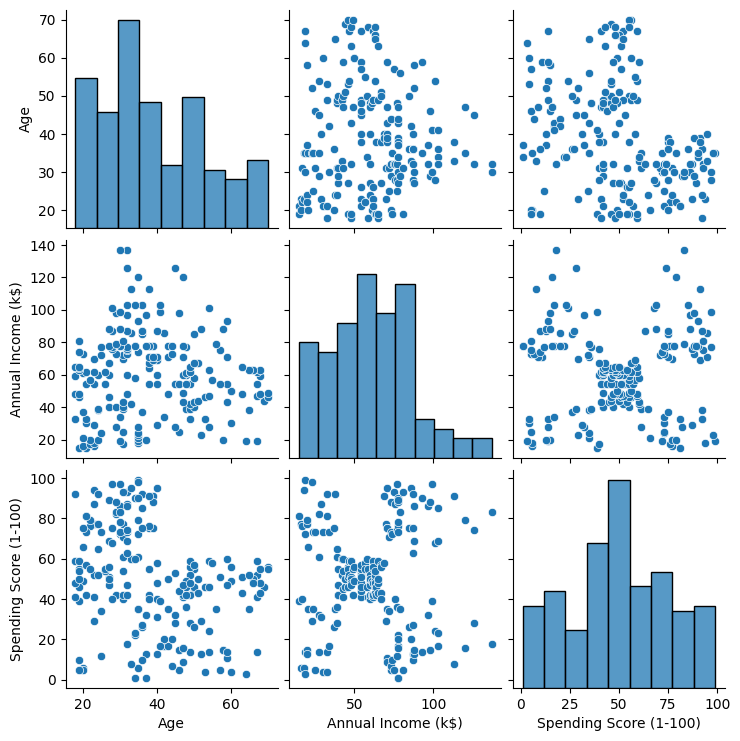

In [83]:
# @title All Atributes Relationship Analysis
sns.pairplot(df.loc[:,df.columns != 'CustomerID'])

In [84]:
# @title 3D Scatter Plot - Age, Annual Income, and Spending Score:


# Define custom colors
custom_colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # Change colors as needed

# Generate the 3D scatter plot
fig = px.scatter_3d(df,
                    x='Age',
                    y='Spending Score (1-100)',
                    z='Annual Income (k$)',
                    color='Gender',
                    title='3D Scatter Plot: Age, Annual Income, and Spending Score',
                    color_discrete_map=custom_colors)  # Apply custom colors

# Adjust figure size
fig.update_layout(
    width=800,  # Adjust width
    height=600  # Adjust height
)

# Show the plot
fig.show()


### Unsupervised Model

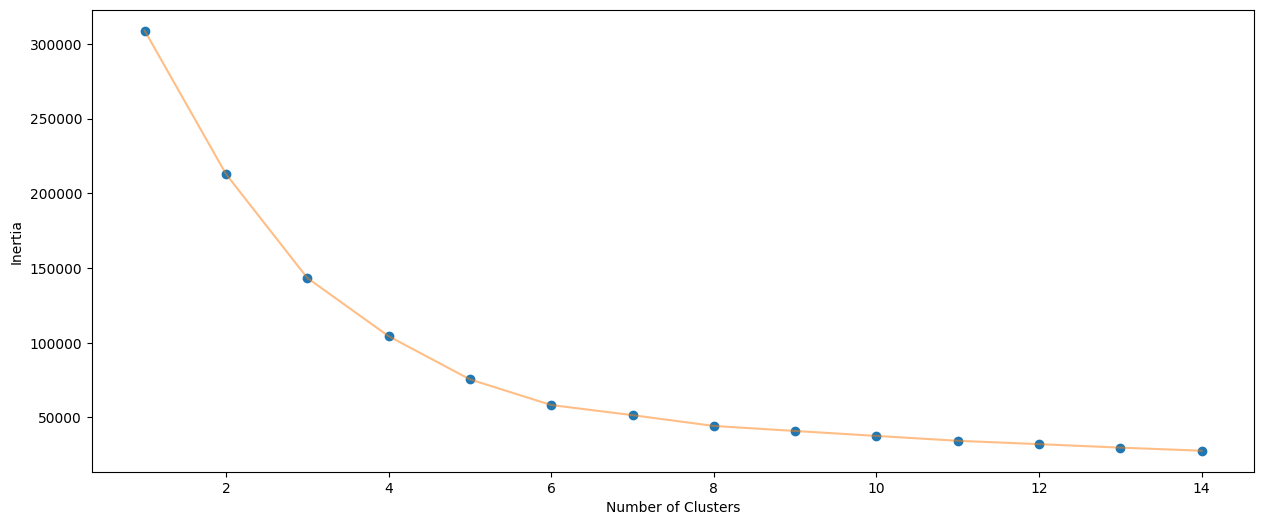

In [85]:
# @title Deciding K Value

X1 = df[['Age','Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [86]:
# @title Applying KMeans
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X1)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [87]:
# @title 3D Scatter Plot - KNN Cluster

# Define a color scale for clusters
color_scale = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

data = []

for idx, cluster_label in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]

    trace = go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Spending Score (1-100)'],
        z=cluster_data['Annual Income (k$)'],
        mode='markers',
        marker=dict(
            color=color_scale[idx % len(color_scale)],  # Cycle through the color scale for each cluster
            size=8,
            line=dict(
                color=cluster_data['cluster'],
                width=8
            ),
            opacity=0.8
        ),
        name=f'Cluster {cluster_label}',
        text=["Customer ID: " + str(cid) for cid in cluster_data['CustomerID']],  # Format Customer ID
        hoverinfo='text+x+y+z'  # Show formatted Customer ID along with coordinates
    )

    data.append(trace)

layout = go.Layout(
    title='Clusters wrt Age, Income and Spending Scores',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    ),
    width=1200,  # Adjust the width of the plot
    height=800   # Adjust the height of the plot
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(showlegend=True)  # Show the legend
fig.show()


#### **Key Observations:**

<p>
Based on the 3D cluster scatter plot showing Age, Spending Score, and Annual Income, here are some hypotheses and conclusions:
</p>

<p>
Key Observations:
</p>

<p>
1. Distinct Clusters Formed
</p>

<p>
The clustering algorithm has effectively segmented the customers into 6 distinct groups based on their demographic and spending behavior.
</p>

<p>
2. High-Income, High-Spending Customers (Purple Cluster - Cluster 2) <br>
These customers have a high annual income and a high spending score.
Likely premium customers who are willing to spend more.
Businesses can target them with luxury or high-end product offerings.
</p>

<p>
3. High-Income, Low-Spending Customers (Brown Cluster - Cluster 0)<br>
Despite having a high annual income, these customers spend less.
Potential reasons:
They may be saving-oriented or not engaged with current product offerings.
Businesses may need to re-engage them with promotions, discounts, or personalized marketing.
</p>

<p>
4. Mid-Income, Mid-Spending Customers (Green Cluster - Cluster 1) <br>
Represent moderate-income and moderate-spending behavior.
They might be stable buyers who are occasional shoppers.
</p>

<p>
5. Low-Income, High-Spending Customers (Red Cluster - Cluster 3) <br>
Despite having low annual income, they spend a lot.
These customers might be brand-loyal or impulse buyers.
Businesses should encourage repeat purchases and build customer loyalty programs.
</p>

<p>
6. Low-Income, Low-Spending Customers (Blue Cluster - Cluster 4) <br>
These customers neither earn much nor spend much.
They may be budget-conscious and less responsive to premium offers.
Discounts and affordability-based marketing strategies could be effective.
</p>

<p>
7. Older vs. Younger Customers <br>
Younger customers might be spending more compared to older age groups.
Older customers might have stable but lower spending habits.
</p>

<p>
Business Strategy Recommendations: <br>

✔ Premium & High-Spenders (Cluster 2 - Purple): Offer VIP memberships, exclusive products, or premium services. <br>

✔ High-Income, Low-Spending (Cluster 0 - Brown): Re-engage with personalized marketing and exclusive discounts. <br>

✔ Budget-Conscious Shoppers (Cluster 4 - Blue): Focus on affordable pricing, discounts, and loyalty programs. <br>

✔ Young, High-Spending Customers (Cluster 3 - Red): Leverage social media marketing and trend-based promotions.
</p>

<p>
Conclusion: <br>
This clustering analysis helps businesses understand customer spending patterns and behavior, enabling them to develop targeted marketing strategies that maximize revenue and customer engagement.
</p>


### Supervised Model

In [88]:
# @title Split the Target and Independent Variables
y = df['cluster']

#Load X Variables into a Pandas Dataframe with columns
X = df.drop(['CustomerID','cluster'], axis = 1)
X['Gender'] = np.where(X['Gender']=="Male", 1, 0)


In [89]:
# @title Divide Data into Train and test

train_x, text_x, train_y, text_y = train_test_split(X, y, test_size=0.10, random_state=43, stratify=y)

In [93]:
# @title Model Application

#Logistic Regression
logitmodel = LogisticRegression(multi_class = "multinomial", solver = "saga").fit(train_x, train_y)
print('Accuracy of LogisticRegression on training set: {:.2f}'.format(logitmodel.score(train_x, train_y)))
print('Accuracy of LogisticRegression on test set: {:.2f}'.format(logitmodel.score(text_x, text_y)))

# Decision Tree
clf = DecisionTreeClassifier(max_depth=3).fit(train_x, train_y)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(train_x, train_y)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(text_x, text_y)))

#KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x, train_y)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(train_x, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(text_x, text_y)))

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(train_x, train_y)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(text_x, text_y)))

mnb = MultinomialNB()
mnb.fit(train_x, train_y)
print('Accuracy of MNB classifier on training set: {:.2f}'.format(mnb.score(train_x, train_y)))
print('Accuracy of MNB classifier on test set: {:.2f}'.format(mnb.score(text_x, text_y)))

#Random Forrest
rf = RandomForestClassifier(n_jobs=8, n_estimators=2, criterion="entropy", random_state=96)
rf.fit(train_x, train_y)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf.score(train_x, train_y)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(text_x, text_y)))

#AdaBoost
ada_clf = AdaBoostClassifier(learning_rate = 0.002, n_estimators = 100)
ada_clf.fit(train_x, train_y)
print('Accuracy of Ada Boost classifier on training set: {:.2f}'.format(ada_clf.score(train_x, train_y)))
print('Accuracy of Ada Boost classifier on test set: {:.2f}'.format(ada_clf.score(text_x, text_y)))

#XGBoost
xb = XGBClassifier(n_estimators=1)
xb.fit(train_x, train_y)
print('Accuracy of XG Boost classifier on training set: {:.2f}'.format(xb.score(train_x, train_y)))
print('Accuracy of XG Boost classifier on test set: {:.2f}'.format(xb.score(text_x, text_y)))

xgb_clf = XGBClassifier(max_depths = 1, n_estimators = 1, learning_rate = 0.0002, n_jobs = -10)
xgb_clf.fit(train_x, train_y)
print('Accuracy of XG Boost classifier on training set: {:.2f}'.format(xgb_clf.score(train_x, train_y)))
print('Accuracy of XG Boost classifier on test set: {:.2f}'.format(xgb_clf.score(text_x, text_y)))

Accuracy of LogisticRegression on training set: 0.83
Accuracy of LogisticRegression on test set: 0.85
Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on test set: 0.95
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95
Accuracy of GNB classifier on training set: 0.99
Accuracy of GNB classifier on test set: 0.95
Accuracy of MNB classifier on training set: 0.82
Accuracy of MNB classifier on test set: 0.85
Accuracy of Random Forest classifier on training set: 0.93
Accuracy of Random Forest classifier on test set: 0.95
Accuracy of Ada Boost classifier on training set: 0.42
Accuracy of Ada Boost classifier on test set: 0.40
Accuracy of XG Boost classifier on training set: 0.99
Accuracy of XG Boost classifier on test set: 0.95
Accuracy of XG Boost classifier on training set: 0.99
Accuracy of XG Boost classifier on test set: 0.95


#### Model Performance Analysis

## Table of Model Accuracy

| Model | Training Accuracy | Test Accuracy | Interpretation |
|--------|-----------------|--------------|----------------|
| **Logistic Regression** | 0.83 | 0.85 | Good baseline model, but slightly underfitting. |
| **Decision Tree** | 0.93 | 0.95 | Strong performance, risk of overfitting. |
| **K-NN** | 0.99 | 0.95 | Possible overfitting, but high test accuracy. |
| **Gaussian Naive Bayes** | 0.99 | 0.95 | Surprisingly good performance, assumes feature independence. |
| **Multinomial Naive Bayes** | 0.82 | 0.85 | Similar to Logistic Regression, works well with categorical data. |
| **Random Forest** | 0.93 | 0.95 | Balanced model with good generalization. |
| **AdaBoost** | 0.42 | 0.40 | Underperforming, needs tuning or better dataset suitability. |
| **XGBoost** | 0.99 | 0.95 | Top performer, slight overfitting risk. |

## Key Takeaways:
- **Best Performing Models:** Decision Tree, Random Forest, K-NN, Gaussian Naïve Bayes, XGBoost (**Test Accuracy: 0.95**)
- **Overfitting Risks:** K-NN and XGBoost (**Training Accuracy: 0.99, Test Accuracy: 0.95**)
- **Underperforming Model:** AdaBoost (**Needs tuning or may not be suitable**)
- **Balanced Models:** Random Forest and Decision Tree (**Good performance without excessive overfitting**)
- **Baseline Models:** Logistic Regression & Naïve Bayes (**Perform decently, but better models exist**)

## Final Recommendation:
- If **interpretability matters**, go for **Logistic Regression** or **Decision Tree**.
- If you want **high accuracy with interpretability**, **Random Forest is the best option**.
- If **you need the highest accuracy** and don’t mind complexity, **XGBoost is the winner**.
- **Avoid AdaBoost** unless tuned properly.

---

## Predicting New Values

In [99]:
# Example: Predicting multiple new customers
new_customers = np.array([[1, 19, 15, 39]])

# Predict
predictions = rf.predict(new_customers)
print(f"Predictions Cluster: {predictions}")


Predictions Cluster: [4]
